In [3]:
import cv2,time


In [8]:

video = cv2.VideoCapture(0)
check,frame = video.read()
time.sleep(3)
print(check)
print(frame)
cv2.imshow("capture",frame)
cv2.waitKey(0)
video.release()
cv2.destroyAllWindows()


True
[[[113 107 137]
  [113 107 137]
  [118 117 141]
  ...
  [145 166 196]
  [142 169 189]
  [141 168 188]]

 [[120 108 138]
  [120 108 138]
  [119 111 136]
  ...
  [144 165 195]
  [142 166 194]
  [143 167 195]]

 [[118 106 136]
  [119 107 137]
  [110 104 134]
  ...
  [137 163 192]
  [136 161 193]
  [135 160 192]]

 ...

 [[142 124 123]
  [138 120 119]
  [108 105 101]
  ...
  [ 13  31  44]
  [ 10  32  39]
  [  9  31  38]]

 [[126 117 112]
  [118 109 104]
  [104 104  98]
  ...
  [ 14  33  41]
  [ 10  32  39]
  [ 10  32  39]]

 [[104  98  95]
  [107 101  98]
  [103 104 100]
  ...
  [ 18  37  45]
  [ 16  34  47]
  [ 16  34  47]]]


Well, the first photo was taken fairly close up with a high quality camera. The second one seems to have been taken from afar and possibly with a mobile phone. This is why the scaleFactor had to be modified. As I said, you’ll have to set up the algorithm on a case-by-case basis to avoid false positives.

ey =  54
ey =  57
In Image image3.jpg Algorithm detected 1 Faces


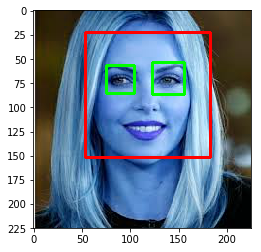

In Image image4.jpg Algorithm detected 1 Faces


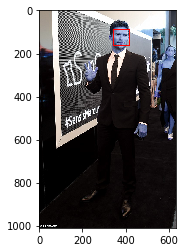

ey =  145
ey =  150
In Image image5.jpg Algorithm detected 1 Faces


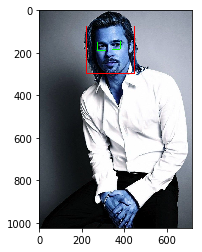

ey =  105
ey =  101
In Image Leo-DiCaprio.jpg Algorithm detected 1 Faces


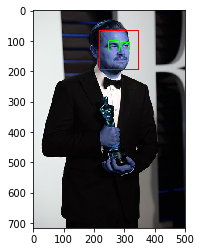

In [6]:
import cv2
import glob
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

imagefiles = [] 
for image in glob.glob("*.jpg"):
    img = cv2.imread(image,1) # Read image as Numpy array . parameter :: 1 if image is colored, 0 for Black & White
    
    imgtest = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Convert  image to black & white to reduce computation

    # Haar Face Cascade . Provide the pre-trained XML file for detecting Face
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    
    # Haar eye Cascade . Provide the pre-trained XML file for detecting eyes
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    
    # Detecting Face
    faces = face_cascade.detectMultiScale(imgtest, scaleFactor=1.75, minNeighbors=5)
   
    for (x, y, w, h) in faces:
        face_detect = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2) # Enclosing Face in a rectangle
        roi_gray = faces[y:y+h, x:x+w]     
        roi_color = imgtest[y:y+h, x:x+w] 
        # For all face detected,now try detecting the eyes.
        eyes = eye_cascade.detectMultiScale(face_detect, scaleFactor=1.15, minNeighbors=5)
    
        for (ex,ey,ew,eh) in eyes:
            print("ey = ",ey)
            eye_detect = cv2.rectangle(face_detect,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            plt.imshow(eye_detect)       
        print('In Image %s Algorithm detected %d Faces' % (image,len(faces)) )
  #  cv2.imshow(image)
        plt.imshow(face_detect)
    plt.show()

In [7]:
import cv2
import sys

cascPath = sys.argv[1]

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    print('ret= ',ret)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True
ret=  True

In [ ]:
# 0 means the default video capture device in OS
video_capture = cv2.VideoCapture(0)
# infinite loop, break by key ESC
while True:
    if not video_capture.isOpened():
        sleep(5)
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.2,
    minNeighbors=10,
    minSize=(self.face_size, self.face_size)
)
# placeholder for cropped faces
face_imgs = np.empty((len(faces), self.face_size, self.face_size, 3))
for i, face in enumerate(faces):
    face_img, cropped = self.crop_face(frame, face, margin=40, size=self.face_size)
    (x, y, w, h) = cropped
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 200, 0), 2)
    face_imgs[i,:,:,:] = face_img
if len(face_imgs) > 0:
    # predict ages and genders of the detected faces
    results = self.model.predict(face_imgs)
    predicted_genders = results[0]
    ages = np.arange(0, 101).reshape(101, 1)
    predicted_ages = results[1].dot(ages).flatten()
    
# draw results
for i, face in enumerate(faces):
    label = "{}, {}".format(int(predicted_ages[i]),
                            "F" if predicted_genders[i][0] > 0.5 else "M")
    self.draw_label(frame, (face[0], face[1]), label)
cv2.imshow('Keras Faces', frame)
if cv2.waitKey(5) == 27:  # ESC key press
    break